In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [82]:
patients_BP = pd.read_csv("BP_Analysis.csv")
patients_BP.head()

,gender,age,height,weight,sysBP,diaBP
0,M,49,152,78,113.0,70.0
1,M,66,182,47,122.0,78.0
2,M,79,150,54,132.0,66.0
3,F,65,184,83,93.0,80.0
4,M,48,187,71,139.0,81.0


In [83]:
patients_BP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10001 non-null  object 
 1   age     10001 non-null  int64  
 2   height  10001 non-null  int64  
 3   weight  10001 non-null  int64  
 4   sysBP   10001 non-null  float64
 5   diaBP   10001 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [84]:
#check if there is any missing data
patients_BP.isna().sum()

gender    0
age       0
height    0
weight    0
sysBP     0
diaBP     0
dtype: int64

In [85]:
features = ['age','height','weight','sysBP','diaBP']

In [86]:
patients_BP_numeric = patients_BP[features].copy()

In [87]:
patients_BP_numeric

,age,height,weight,sysBP,diaBP
0,49,152,78,113.0,70.0
1,66,182,47,122.0,78.0
2,79,150,54,132.0,66.0
3,65,184,83,93.0,80.0
4,48,187,71,139.0,81.0
...,...,...,...,...,...
9996,48,185,94,131.0,72.0
9997,44,156,102,126.5,87.0
9998,52,159,95,133.5,83.0
9999,40,174,59,141.0,98.0


In [88]:
patients_BP_numeric = patients_BP_numeric.dropna(subset=features)

In [90]:
patients_BP_numeric = ((patients_BP_numeric - patients_BP_numeric.min()) / (patients_BP_numeric.max() - patients_BP_numeric.min())) * 9 + 1

In [91]:
patients_BP_numeric.describe()

,age,height,weight,sysBP,diaBP
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,5.219445,5.543106,5.611910,2.622123,3.789345
std,2.233762,2.514386,2.388096,0.853753,1.048515
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.475000,3.571429,2.042553,3.000000
50%,5.000000,5.500000,5.714286,2.553191,3.761905
75%,6.833333,7.750000,7.571429,3.063830,4.428571
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [92]:
patients_BP_numeric.head()

,age,height,weight,sysBP,diaBP
0,4.833333,1.450,6.000000,2.255319,3.095238
1,7.666667,8.200,1.571429,2.638298,3.857143
2,9.833333,1.000,2.571429,3.063830,2.714286
3,7.500000,8.650,6.714286,1.404255,4.047619
4,4.666667,9.325,5.000000,3.361702,4.142857


In [93]:
# the number of centroids is the number of clusters we want
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = patients_BP_numeric.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


In [94]:
centroids = random_centroids(patients_BP_numeric,5)

In [95]:
centroids

,0,1,2,3,4
age,8.833333,8.500000,1.333333,6.166667,1.166667
height,2.800000,7.075000,4.825000,5.500000,7.750000
weight,1.428571,2.142857,5.142857,6.857143,4.000000
sysBP,2.808511,2.680851,2.000000,2.340426,3.021277
diaBP,3.190476,4.142857,2.904762,3.190476,3.571429


In [96]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((patients_BP_numeric-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [97]:
labels = get_labels(patients_BP_numeric, centroids)

In [98]:
labels.value_counts()

3    4832
2    1764
4    1349
1    1206
0     850
dtype: int64

In [99]:
def new_centroids(data,labels,k):       
    return patients_BP_numeric.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
# spliiting the dataframe to clusters, t ech group we calculate the geometric mean which is the cluster centroid 
# geometric means to each feature by clusters (0 - 4)

In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from IPython.display import clear_output

# DATA VISUALISATION

In [101]:
def plot_clusters(data,labels,centroids,iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x= data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x = centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

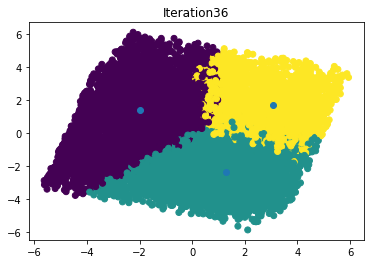

In [102]:
max_iterations = 100
k = 3

centroids = random_centroids(patients_BP_numeric,k)
old_centroids = pd.DataFrame()

iteration = 1 

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(patients_BP_numeric, centroids)
    centroids = new_centroids(patients_BP_numeric,labels,k)
    plot_clusters(patients_BP_numeric,labels,centroids,iteration)
    iteration += 1


In [104]:
centroids

,0,1,2
age,4.679177,4.812040,4.455044
height,7.822634,3.656769,3.031079
weight,4.705765,7.510367,2.962462
sysBP,2.526423,2.525639,2.390895
diaBP,3.687489,3.691431,3.523335


In [107]:
patients_BP[labels == 2]

,gender,age,height,weight,sysBP,diaBP
2,M,79,150,54,132.0,66.0
9,F,78,168,60,127.0,60.0
11,F,29,151,59,133.0,70.0
16,F,54,154,43,122.0,84.0
18,M,44,161,49,92.0,81.0
...,...,...,...,...,...,...
9984,F,56,163,65,149.0,98.0
9985,M,47,163,65,120.0,80.0
9988,F,43,160,69,129.5,88.0
9990,F,51,154,63,140.0,80.0


# using SCIKIT Learn

In [108]:
from sklearn.cluster import KMeans

In [110]:
kmeans = KMeans(3)
kmeans.fit(patients_BP_numeric)

KMeans(n_clusters=3)

In [111]:
centroids = kmeans.cluster_centers_

In [112]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
age,5.357897,5.274855,5.020273
height,7.070584,2.983489,7.378433
weight,3.262790,5.720291,7.657765
sysBP,2.547198,2.595364,2.725802
diaBP,3.697314,3.757206,3.915767
